## Connecting and getting data from **Kaggle**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sameer2990265","key":"a129b58a061fa3615bd9c79c1fd96873"}'}

In [ ]:
! mkdir ~/.kaggle
# making kaggle directory

In [ ]:
! cp kaggle.json ~/.kaggle/
# taking json file to kaggle directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
# Allowing permissions to json

In [ ]:
! kaggle datasets list
# checking if it is connected by loading lists

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/2024-electric-car-data-washington-state   Electric Vehicle Data (1997 - 2024)                  6MB  2024-08-04 10:33:24           1046         26  1.0              
myrios/cost-of-living-index-by-country-by-number-2024      Cost of Living Index by Country                      3KB  2024-07-19 06:25:42           2908         42  1.0              
muhammadehsan000/olympic-historical-dataset-1896-2020      Olympic Historical Dataset (1896 - 2022)            27MB  2024-08-06 16:46:08           1700         30  1.0              
waqi786/heart-attack-dataset                               ❤️ Heart Attack Risk Factors Da

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:20<00:00, 227MB/s]
100% 2.70G/2.70G [00:20<00:00, 140MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

## Importing libraries for CNN construction

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Image Data Processing**

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
valid_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = training_set.class_names
print(class_names)
# printing the class names

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

## **Building CNN**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding = 'same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding = 'same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding = 'same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding = 'same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding = 'same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1600,activation='relu'))

In [ ]:
model.add(Dropout(0.3))
# to avoid overfitting

In [ ]:
model.add(Dense(units=38,activation='softmax'))
#output layer

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()
# Architecture of cnn

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1600)                │         206,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1600)                │       2,561,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,912,966 (11.11 MB)

 Trainable params: 2,912,966 (11.11 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [ ]:
training_history = model.fit(x = training_set,validation_data=valid_set,epochs=10)
# training model

In [ ]:
train_loss,train_auc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.8941 - loss: 0.3444


In [ ]:
print(train_loss,train_auc)

0.3354546129703522 0.8975176215171814


## Evaluating Model

In [ ]:
valid_loss,valid_auc = model.evaluate(valid_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8748 - loss: 0.4027


In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
tt = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step


## Manually detecting output

In [ ]:
y_pred = np.argmax(tt,axis=1)
for i in y_pred:
  if(i<4):print(i)

In [ ]:
# test a single image to the model

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy/00a3fc0e-64cc-4e35-ac2f-aef04fda9b22___Mary_HL 9177_270deg.JPG', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image=test_image
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.argmax(result))
print(class_names[np.argmax(result)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
10
Corn_(maize)___healthy


## Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
# save history of model in json file

import json
# Get the training history as a dictionary
history_dict = training_history.history

# Save the history to a JSON file
with open('training_history.json', 'w') as json_file:
  json.dump(history_dict, json_file)


In [ ]:
# cresting tflite model
converter  = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpbhae38di'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  136844962864064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844962963248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911682384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911684672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911686256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911776464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911778928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911781216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911785264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136844911787552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1368449163440

In [4]:
# from training_history
accuracy = [0.3874955475330353, 0.6723949313163757, 0.7530407309532166, 0.7864570617675781, 0.8064157962799072, 0.8191336393356323, 0.8261896371841431, 0.8335585594177246, 0.8382388353347778, 0.8394480347633362]
loss = [2.0977916717529297, 1.040212631225586, 0.7757840752601624, 0.6689589619636536, 0.6016654968261719, 0.5622941851615906, 0.5438535213470459, 0.5157757997512817, 0.507938027381897, 0.5012311935424805]
val_accuracy =  [0.6756772398948669, 0.7452196478843689, 0.8139085173606873, 0.8361598253250122, 0.8419075608253479, 0.8594354391098022, 0.8591509461402893, 0.8611996173858643, 0.8643864989280701, 0.866662859916687]
val_loss = [1.0353569984436035, 0.7866131663322449, 0.5839403867721558, 0.49679943919181824, 0.49180519580841064, 0.4258973002433777, 0.4366096258163452, 0.4260203242301941, 0.4258784353733063, 0.41726991534233093]

Text(0, 0.5, 'Accuracy')

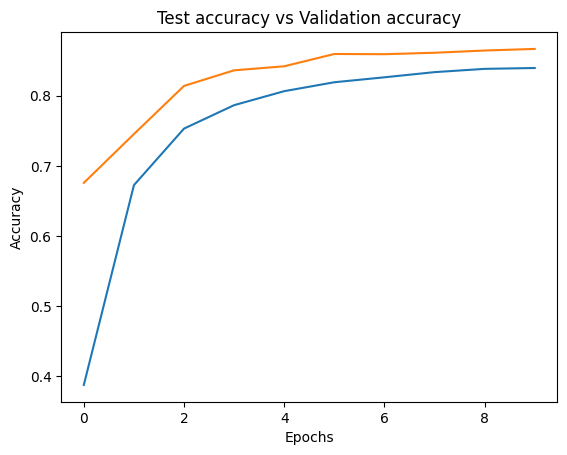

In [5]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Test accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

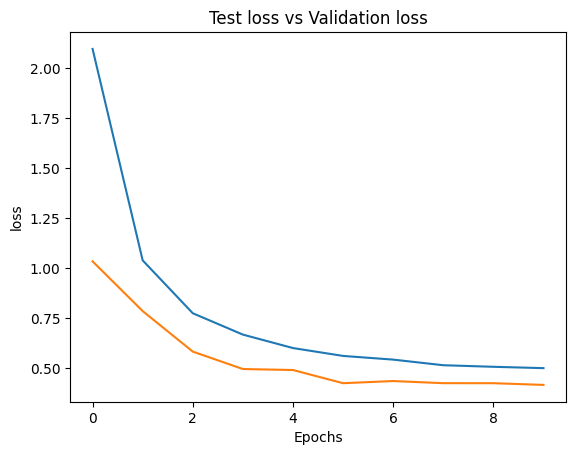

In [6]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Test loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')